In [5]:
import os
import glob
import numpy as np
import clima_anom as ca
import matplotlib.pyplot as plt
import matplotlib.cbook
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs

In [6]:
list_files = glob.glob('/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/season/*.nc')
list_files = sorted(list_files)
list_files

['/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/season/3B42_1999_01_2013_12_1dy_05x05_autumn.nc',
 '/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/season/3B42_1999_01_2013_12_1dy_05x05_spring.nc',
 '/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/season/3B42_1999_01_2013_12_1dy_05x05_summer.nc',
 '/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/season/3B42_1999_01_2013_12_1dy_05x05_winter.nc']

In [14]:
season_mean = np.zeros([4,120,110])

data = ca.read_netcdf(list_files[0],1)
lat = data['lat']
lon = data['lon']
tmp = data['prec']
season_mean[1,:,:] = np.mean(tmp,axis=0)

data = ca.read_netcdf(list_files[1],1)
tmp = data['prec']
season_mean[3,:,:] = np.mean(tmp,axis=0)

data = ca.read_netcdf(list_files[2],1)
tmp = data['prec']
season_mean[0,:,:] = np.mean(tmp,axis=0)

data = ca.read_netcdf(list_files[3],1)
tmp = data['prec']
season_mean[2,:,:] = np.mean(tmp,axis=0)

lon2d, lat2d = np.meshgrid(lon, lat)

Number of variables:  4
Number of variables:  4
Number of variables:  4
Number of variables:  4


../images/3B42_Season_climatology.png


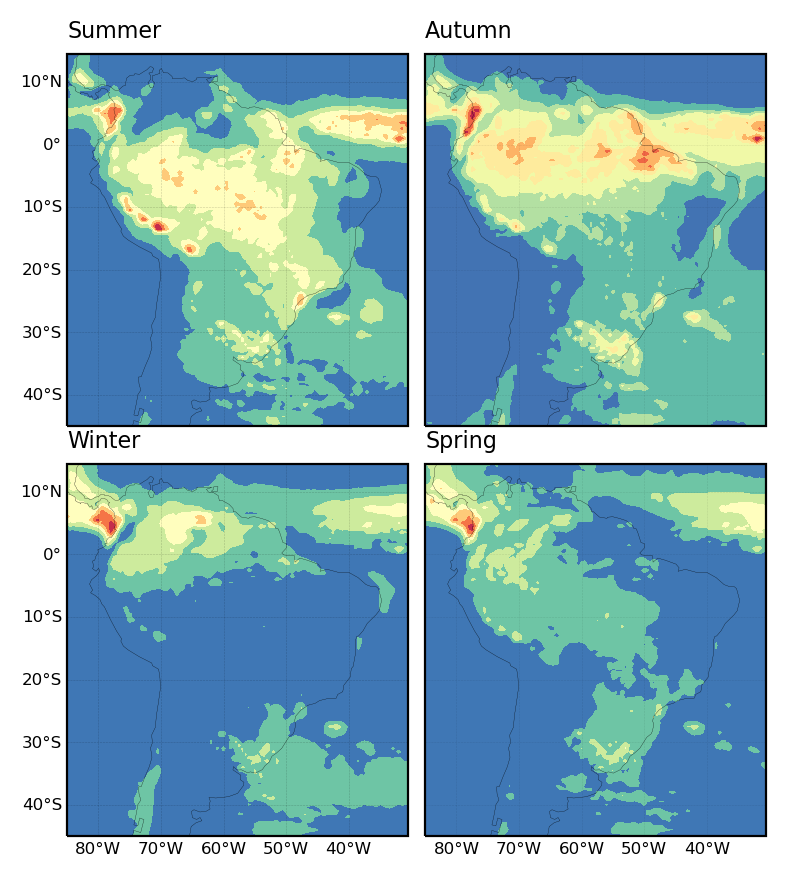

In [39]:
season_names = ['Summer', 'Autumn', 'Winter', 'Spring']
linewidth_shape = 0.2
levels = None

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(4.51,5.3),dpi=200)
gs = gridspec.GridSpec(2,2)

a = 0
for row in range(2):
    for col in range(2):
        ax1 = plt.subplot(gs[row, col], projection = proj)
        ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
        a1 = ax1.contourf(lon2d, lat2d,season_mean[a,:,:],levels = levels, cmap=cmap)
        ax1.set_title(season_names[a],fontsize=8,loc='left')
        # ax1.text(0.1, 0.25, list_month[a], va='bottom', ha='center',rotation_mode='anchor',transform=ax1.transAxes)

        if col == 0:
            gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='k',alpha=0.1,linestyle='--')
            gl.top_labels = False
            gl.bottom_labels = False
            gl.left_labels = True
            gl.right_labels = False
            gl.xlabel_style = {'size': 6, 'color': 'k'}
            gl.ylabel_style = {'size': 6, 'color': 'k'}

        if row == 1:
            gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='k',alpha=0.1,linestyle='--')
            gl.top_labels = False
            gl.bottom_labels = True
            gl.left_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 6, 'color': 'k'}
            gl.ylabel_style = {'size': 6, 'color': 'k'}

        else:
            gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='k',alpha=0.1,linestyle='--')
            gl.top_labels = False
            gl.bottom_labels = False
            gl.left_labels = False
            gl.right_labels = False
            gl.xlabel_style = {'size': 6, 'color': 'k'}
            gl.ylabel_style = {'size': 6, 'color': 'k'}  

        a = a + 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.05, wspace=0.05)

salida = '../images/3B42_Season_climatology.png'
print(salida)
plt.savefig(salida,facecolor='white',bbox_inches ='tight',pad_inches = 0.1)